In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.prompt {min-width:70px;}
</style>
"""))

# 시작전 설정

In [2]:
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

# 시각화를 선명하게 표시되도록
%config InlineBackend.figure_format='retina'

#한글 폰트 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

# 경고 메세지 안 보이게 
import warnings
# 모든 컬럼이 표시되도록 max_columns 의 수 지정
pd.options.display.max_columns = 50


# 데이터 로드

## 범죄원부 로우데이터 로드

In [3]:
df = pd.read_csv("./../data/범죄원부2017_2019.csv", sep=",",encoding='cp949')

## 데이터 확인 및 결측치 확인

In [4]:
df.shape

(9953, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9953 non-null   int64 
 1   작성년월              9953 non-null   int64 
 2   경찰서명(작성지관서)       9953 non-null   object
 3   발생 건수(전체)_건수      9953 non-null   int64 
 4   피해자 성별(남자)_건수     9953 non-null   int64 
 5   피해자 성별(여자)_건수     9953 non-null   int64 
 6   피해자 성별(불상)_건수     9953 non-null   int64 
 7   피해자 연령(6세이하)_건수   9953 non-null   int64 
 8   피해자 연령(12세이하)_건수  9953 non-null   int64 
 9   피해자 연령(15세이하)_건수  9953 non-null   int64 
 10  피해자 연령(20세이하)_건수  9953 non-null   int64 
 11  피해자 연령(30세이하)_건수  9953 non-null   int64 
 12  피해자 연령(40세이하)_건수  9953 non-null   int64 
 13  피해자 연령(50세이하)_건수  9953 non-null   int64 
 14  피해자 연령(60세이하)_건수  9953 non-null   int64 
 15  피해자 연령(60세초과)_건수  9953 non-null   int64 
 16  피해자 연령(미상)_건수     9953 non-null   int64 
 17  범죄유형(강력범죄)_건수 

In [6]:
df.isnull().sum()

Unnamed: 0          0
작성년월                0
경찰서명(작성지관서)         0
발생 건수(전체)_건수        0
피해자 성별(남자)_건수       0
피해자 성별(여자)_건수       0
피해자 성별(불상)_건수       0
피해자 연령(6세이하)_건수     0
피해자 연령(12세이하)_건수    0
피해자 연령(15세이하)_건수    0
피해자 연령(20세이하)_건수    0
피해자 연령(30세이하)_건수    0
피해자 연령(40세이하)_건수    0
피해자 연령(50세이하)_건수    0
피해자 연령(60세이하)_건수    0
피해자 연령(60세초과)_건수    0
피해자 연령(미상)_건수       0
범죄유형(강력범죄)_건수       0
범죄유형(폭력범죄)_건수       0
범죄유형(절도범죄)_건수       0
범죄유형(지능범죄)_건수       0
범죄유형(기타범죄)_건수       0
수사단서정보(고발)_건수       0
수사단서정보(고소)_건수       0
수사단서정보(진정)_건수       0
수사단서정보(탄원)_건수       0
수사단서정보(피해자신고)_건수    0
수사단서정보(타인신고)_건수     0
수사단서정보(탐문정보)_건수     0
수사단서정보(불심검문)_건수     0
수사단서정보(자수)_건수       0
수사단서정보(여죄)_건수       0
수사단서정보(변사체)_건수      0
수사단서정보(현행범)_건수      0
수사단서정보(기타)_건수       0
발생요일(일)_건수          0
발생요일(월)_건수          0
발생요일(화)_건수          0
발생요일(수)_건수          0
발생요일(목)_건수          0
발생요일(금)_건수          0
발생요일(토)_건수          0
dtype: int64

## 경찰서 관할 행정구역 로드

In [7]:
police_region = pd.read_csv("./../data/경찰서_행정구역.csv", sep=",",encoding='cp949')

In [8]:
police_region

,광역,기초,경찰서
0,강원,강릉시,강원강릉경찰서
1,강원,고성군,강원고성경찰서
2,강원,동해시,강원동해경찰서
3,강원,삼척시,강원삼척경찰서
4,강원,속초시,강원속초경찰서
...,...,...,...
282,충북,충주시,충북충주경찰서
283,충북,청주시,충북청주상당경찰서
284,충북,청주시,충북청주청원경찰서
285,충북,청주시,충북청주흥덕경찰서


# 전처리

## 분석에 필요한 컬럼만 가져오기
- 작성년월
- 경찰서명
- 피해자 남자수
- 피해자 여자수
- 피해자 불상수
- 피해자 연령 
- 범죄 유형
- 발생 요일

In [9]:
df[['작성년월','경찰서명(작성지관서)','피해자 성별(남자)_건수']]

,작성년월,경찰서명(작성지관서),피해자 성별(남자)_건수
0,201701,경기의왕경찰서,97
1,201701,경기의정부경찰서,454
2,201701,경기이천경찰서,156
3,201701,경기일산동부경찰서,411
4,201701,경기일산서부경찰서,249
...,...,...,...
9948,201912,충북충주경찰서,284
9949,201912,태안해양경비안전서,4
9950,201912,통영해양경비안전서,13
9951,201912,평택해양경비안전서,7


In [10]:
df2 = df[['작성년월',
'경찰서명(작성지관서)',
'피해자 성별(남자)_건수',
'피해자 성별(여자)_건수',
'피해자 성별(불상)_건수',
'피해자 연령(6세이하)_건수',
'피해자 연령(12세이하)_건수',
'피해자 연령(15세이하)_건수',
'피해자 연령(20세이하)_건수',
'피해자 연령(30세이하)_건수',
'피해자 연령(40세이하)_건수',
'피해자 연령(50세이하)_건수',
'피해자 연령(60세이하)_건수',
'피해자 연령(60세초과)_건수',
'피해자 연령(미상)_건수',
'범죄유형(강력범죄)_건수',
'범죄유형(폭력범죄)_건수',
'범죄유형(절도범죄)_건수',
'범죄유형(지능범죄)_건수',
'범죄유형(기타범죄)_건수',
'발생요일(일)_건수',
'발생요일(월)_건수',
'발생요일(화)_건수',
'발생요일(수)_건수',
'발생요일(목)_건수',
'발생요일(금)_건수',
'발생요일(토)_건수'
]]

In [11]:
df2.head()

,작성년월,경찰서명(작성지관서),피해자 성별(남자)_건수,피해자 성별(여자)_건수,피해자 성별(불상)_건수,피해자 연령(6세이하)_건수,피해자 연령(12세이하)_건수,피해자 연령(15세이하)_건수,피해자 연령(20세이하)_건수,피해자 연령(30세이하)_건수,피해자 연령(40세이하)_건수,피해자 연령(50세이하)_건수,피해자 연령(60세이하)_건수,피해자 연령(60세초과)_건수,피해자 연령(미상)_건수,범죄유형(강력범죄)_건수,범죄유형(폭력범죄)_건수,범죄유형(절도범죄)_건수,범죄유형(지능범죄)_건수,범죄유형(기타범죄)_건수,발생요일(일)_건수,발생요일(월)_건수,발생요일(화)_건수,발생요일(수)_건수,발생요일(목)_건수,발생요일(금)_건수,발생요일(토)_건수
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,29,32,29,28,32,25
1,201701,경기의정부경찰서,454,332,297,4,7,9,62,145,142,167,154,94,299,9,241,106,216,511,135,147,154,169,150,171,157
2,201701,경기이천경찰서,156,89,184,0,4,5,23,55,38,46,52,21,185,3,65,15,59,287,68,66,60,65,60,52,58
3,201701,경기일산동부경찰서,411,265,210,3,4,6,31,123,143,180,127,59,210,14,143,79,157,493,102,117,134,137,124,143,129
4,201701,경기일산서부경찰서,249,142,113,1,2,4,19,67,74,92,76,55,114,7,67,40,75,315,49,70,74,66,85,87,73


## 칼럼 이름 바꾸기

In [12]:
df2.columns = ['발생년월','경찰서','피해자(남자)','피해자(여자)','성별미상',
'00~06세','07~12세','13~15세','16~20세','21~30세','31~40세','41~50세','51~60세','61~세','나이미상',
'강력','폭력','절도','지능','기타',
'일','월','화','수','목','금','토']

In [13]:
df2.head()

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,29,32,29,28,32,25
1,201701,경기의정부경찰서,454,332,297,4,7,9,62,145,142,167,154,94,299,9,241,106,216,511,135,147,154,169,150,171,157
2,201701,경기이천경찰서,156,89,184,0,4,5,23,55,38,46,52,21,185,3,65,15,59,287,68,66,60,65,60,52,58
3,201701,경기일산동부경찰서,411,265,210,3,4,6,31,123,143,180,127,59,210,14,143,79,157,493,102,117,134,137,124,143,129
4,201701,경기일산서부경찰서,249,142,113,1,2,4,19,67,74,92,76,55,114,7,67,40,75,315,49,70,74,66,85,87,73


## 행정구역과 조인

In [14]:
df3 = pd.merge(df2, police_region)


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10169 entries, 0 to 10168
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   발생년월     10169 non-null  int64 
 1   경찰서      10169 non-null  object
 2   피해자(남자)  10169 non-null  int64 
 3   피해자(여자)  10169 non-null  int64 
 4   성별미상     10169 non-null  int64 
 5   00~06세   10169 non-null  int64 
 6   07~12세   10169 non-null  int64 
 7   13~15세   10169 non-null  int64 
 8   16~20세   10169 non-null  int64 
 9   21~30세   10169 non-null  int64 
 10  31~40세   10169 non-null  int64 
 11  41~50세   10169 non-null  int64 
 12  51~60세   10169 non-null  int64 
 13  61~세     10169 non-null  int64 
 14  나이미상     10169 non-null  int64 
 15  강력       10169 non-null  int64 
 16  폭력       10169 non-null  int64 
 17  절도       10169 non-null  int64 
 18  지능       10169 non-null  int64 
 19  기타       10169 non-null  int64 
 20  일        10169 non-null  int64 
 21  월        10169 non-null  int64 
 22

In [16]:
df3['광역'].unique()

array(['경기', '경남', '경북', '광주', '전북', '대구', '대전', '강원', '전남', '충남', '부산',
       '제주', '서울', '울산', '인천', '세종', '충북'], dtype=object)

## 작성년, 작성월 칼럼 추가

In [17]:
df3['년도'] = df3['발생년월']//100
df3['월'] = df3['발생년월']%100
df3['총피해자'] = df3['피해자(남자)']+df3['피해자(여자)']+df3['성별미상']
#'abc'[1:2]

In [18]:
df3

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,년도,총피해자
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,1,32,29,28,32,25,경기,의왕시,2017,205
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,2,45,37,37,33,39,경기,의왕시,2017,250
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,3,51,45,44,48,34,경기,의왕시,2017,303
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,4,38,36,46,53,41,경기,의왕시,2017,288
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,5,32,31,34,30,28,경기,의왕시,2017,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,201908,경기화성동탄경찰서,443,246,184,9,13,16,36,133,174,156,110,41,185,14,220,99,150,390,86,8,130,138,122,128,124,경기,화성시,2019,873
10165,201909,경기화성동탄경찰서,449,271,244,5,7,15,41,148,146,177,119,61,245,17,192,102,202,451,95,9,155,143,153,160,115,경기,화성시,2019,964
10166,201910,경기화성동탄경찰서,443,292,292,3,12,16,40,129,169,176,133,56,293,15,191,92,216,513,88,10,188,163,153,154,147,경기,화성시,2019,1027
10167,201911,경기화성동탄경찰서,556,325,228,2,17,16,44,153,206,195,158,87,231,11,204,134,327,433,113,11,189,157,180,177,135,경기,화성시,2019,1109


In [19]:
df_metro = df3.groupby(['광역']).sum().sort_values(by=['총피해자'],ascending=False)/1000



Text(0, 0.5, '총피해자 (단위:천명)')

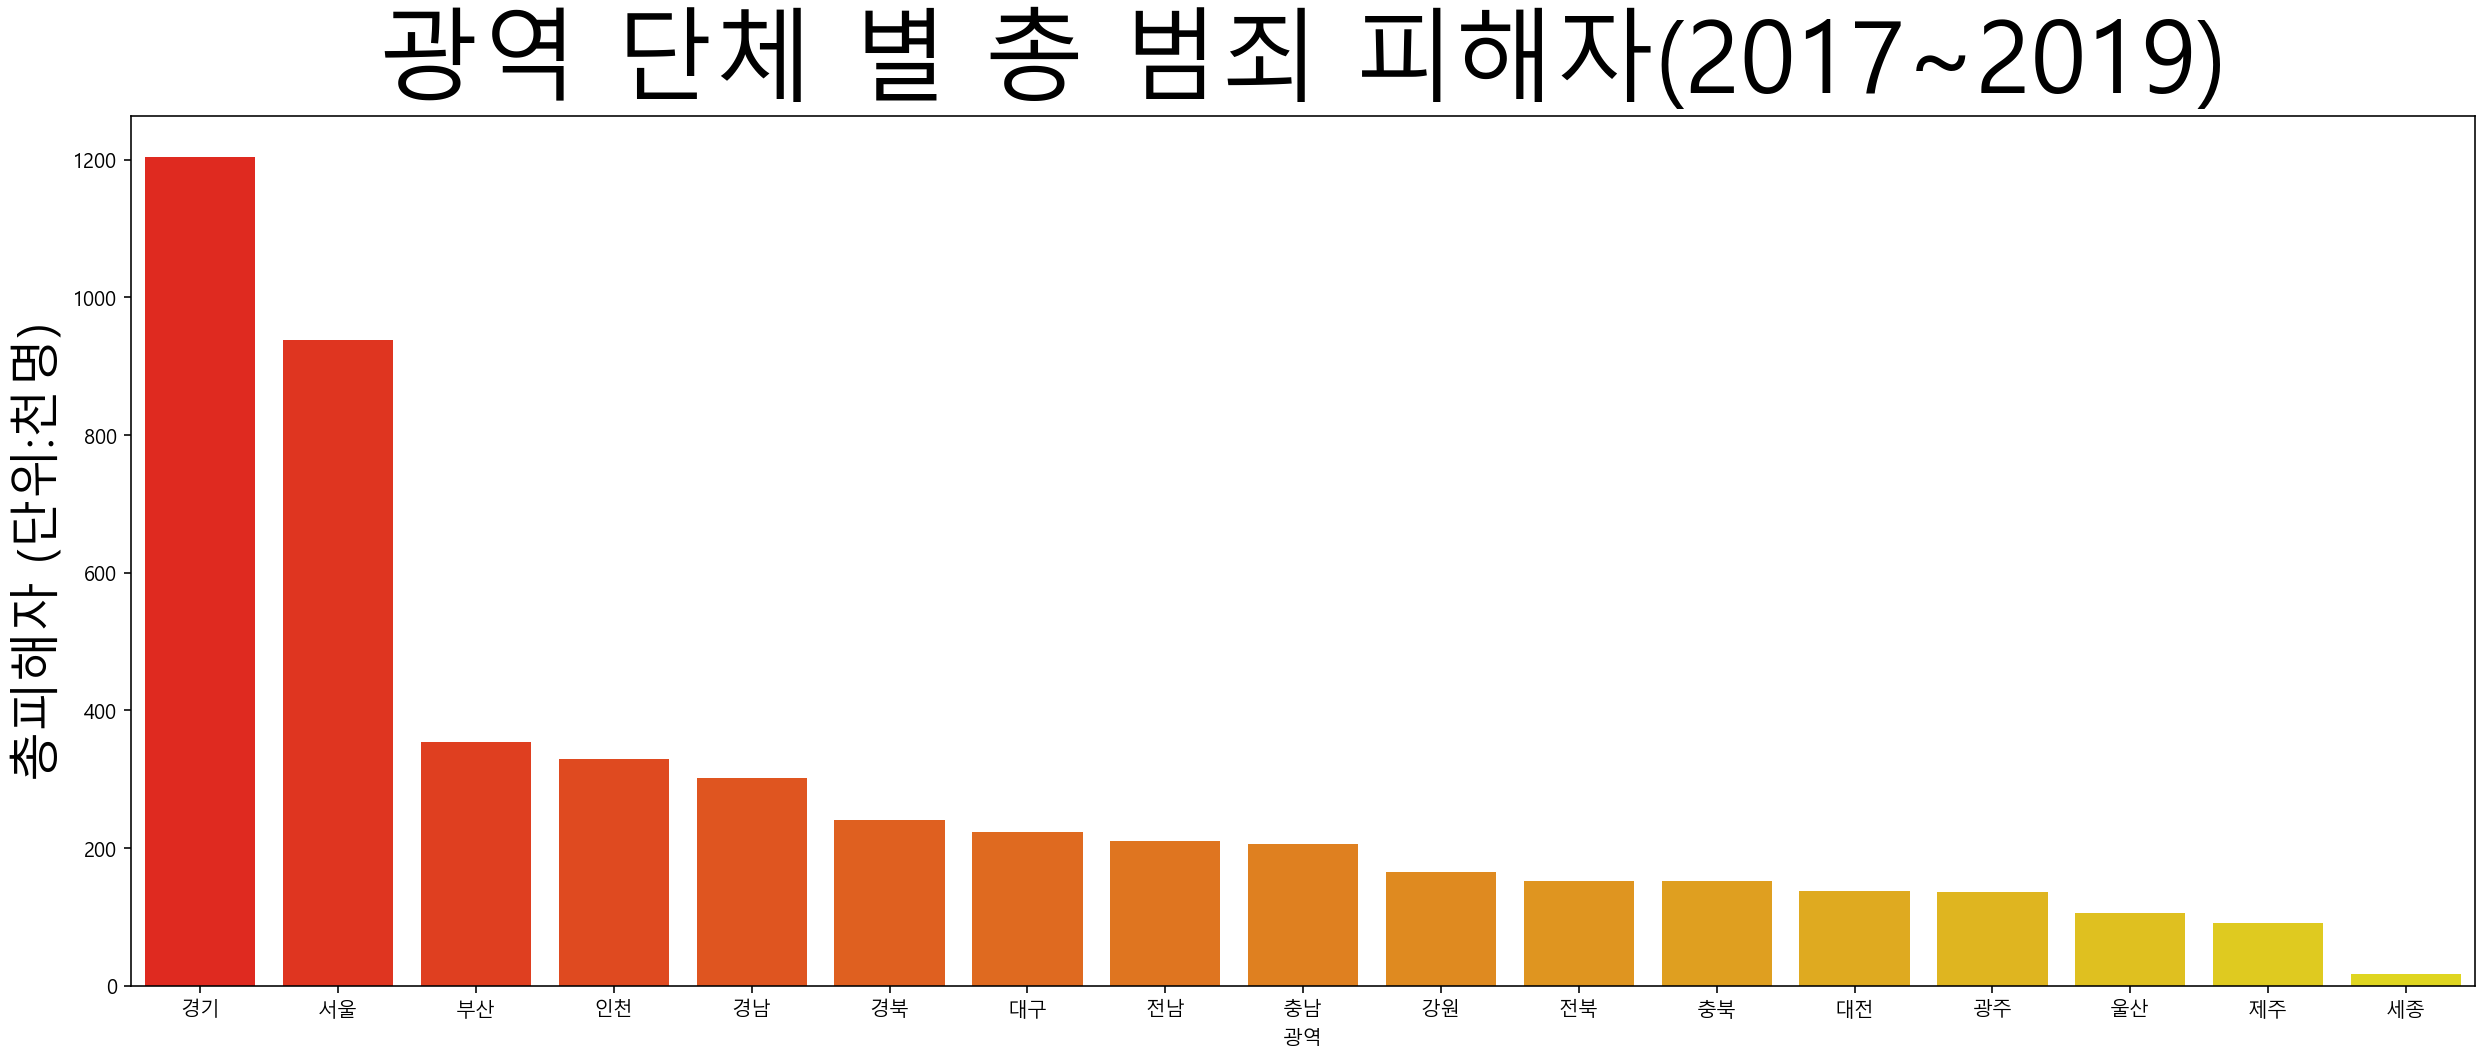

In [20]:
plt.figure(figsize=(21,8))
plt.title('광역 단체 별 총 범죄 피해자(2017~2019)', fontsize=50)

b=sns.barplot(data=df_metro, x=df_metro.index,y='총피해자',palette='spring')
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
#b.set_xlabel('광역 단체명', fontsize=25)
b.set_ylabel('총피해자 (단위:천명)', fontsize=25)


In [21]:
df_metro2 = df3.groupby(['광역','년도']).sum().sort_values(by=['광역','년도','총피해자'])/1000
df_metro2 = df_metro2.reset_index()
df_metro2 = df_metro2[['광역','년도','총피해자']]

In [22]:
df_metro2.head()

,광역,년도,총피해자
0,강원,2017,59.670
1,강원,2018,51.950
2,강원,2019,53.003
3,경기,2017,417.970
4,경기,2018,390.175


In [23]:
df_metro2_pivot = df_metro2.pivot(index='광역', columns='년도', values='총피해자')



In [24]:
df_metro2_pivot

년도,2017,2018,2019
광역,,,
강원,59.670,51.950,53.003
경기,417.970,390.175,395.318
경남,104.281,94.904,101.820
경북,81.129,78.056,81.468
광주,48.163,43.482,44.231
대구,74.932,72.265,75.749
대전,46.944,45.429,45.110
부산,119.763,115.925,118.578
서울,319.875,308.504,308.989


In [25]:
df_metro2_pivot.columns=[2017,2018,2019]

In [26]:
df_metro2_pivot[[2017]]


,2017
광역,
강원,59.670
경기,417.970
경남,104.281
경북,81.129
광주,48.163
대구,74.932
대전,46.944
부산,119.763
서울,319.875


Text(0, 0.5, '총피해자 (단위:천명)')

<Figure size 1512x576 with 0 Axes>

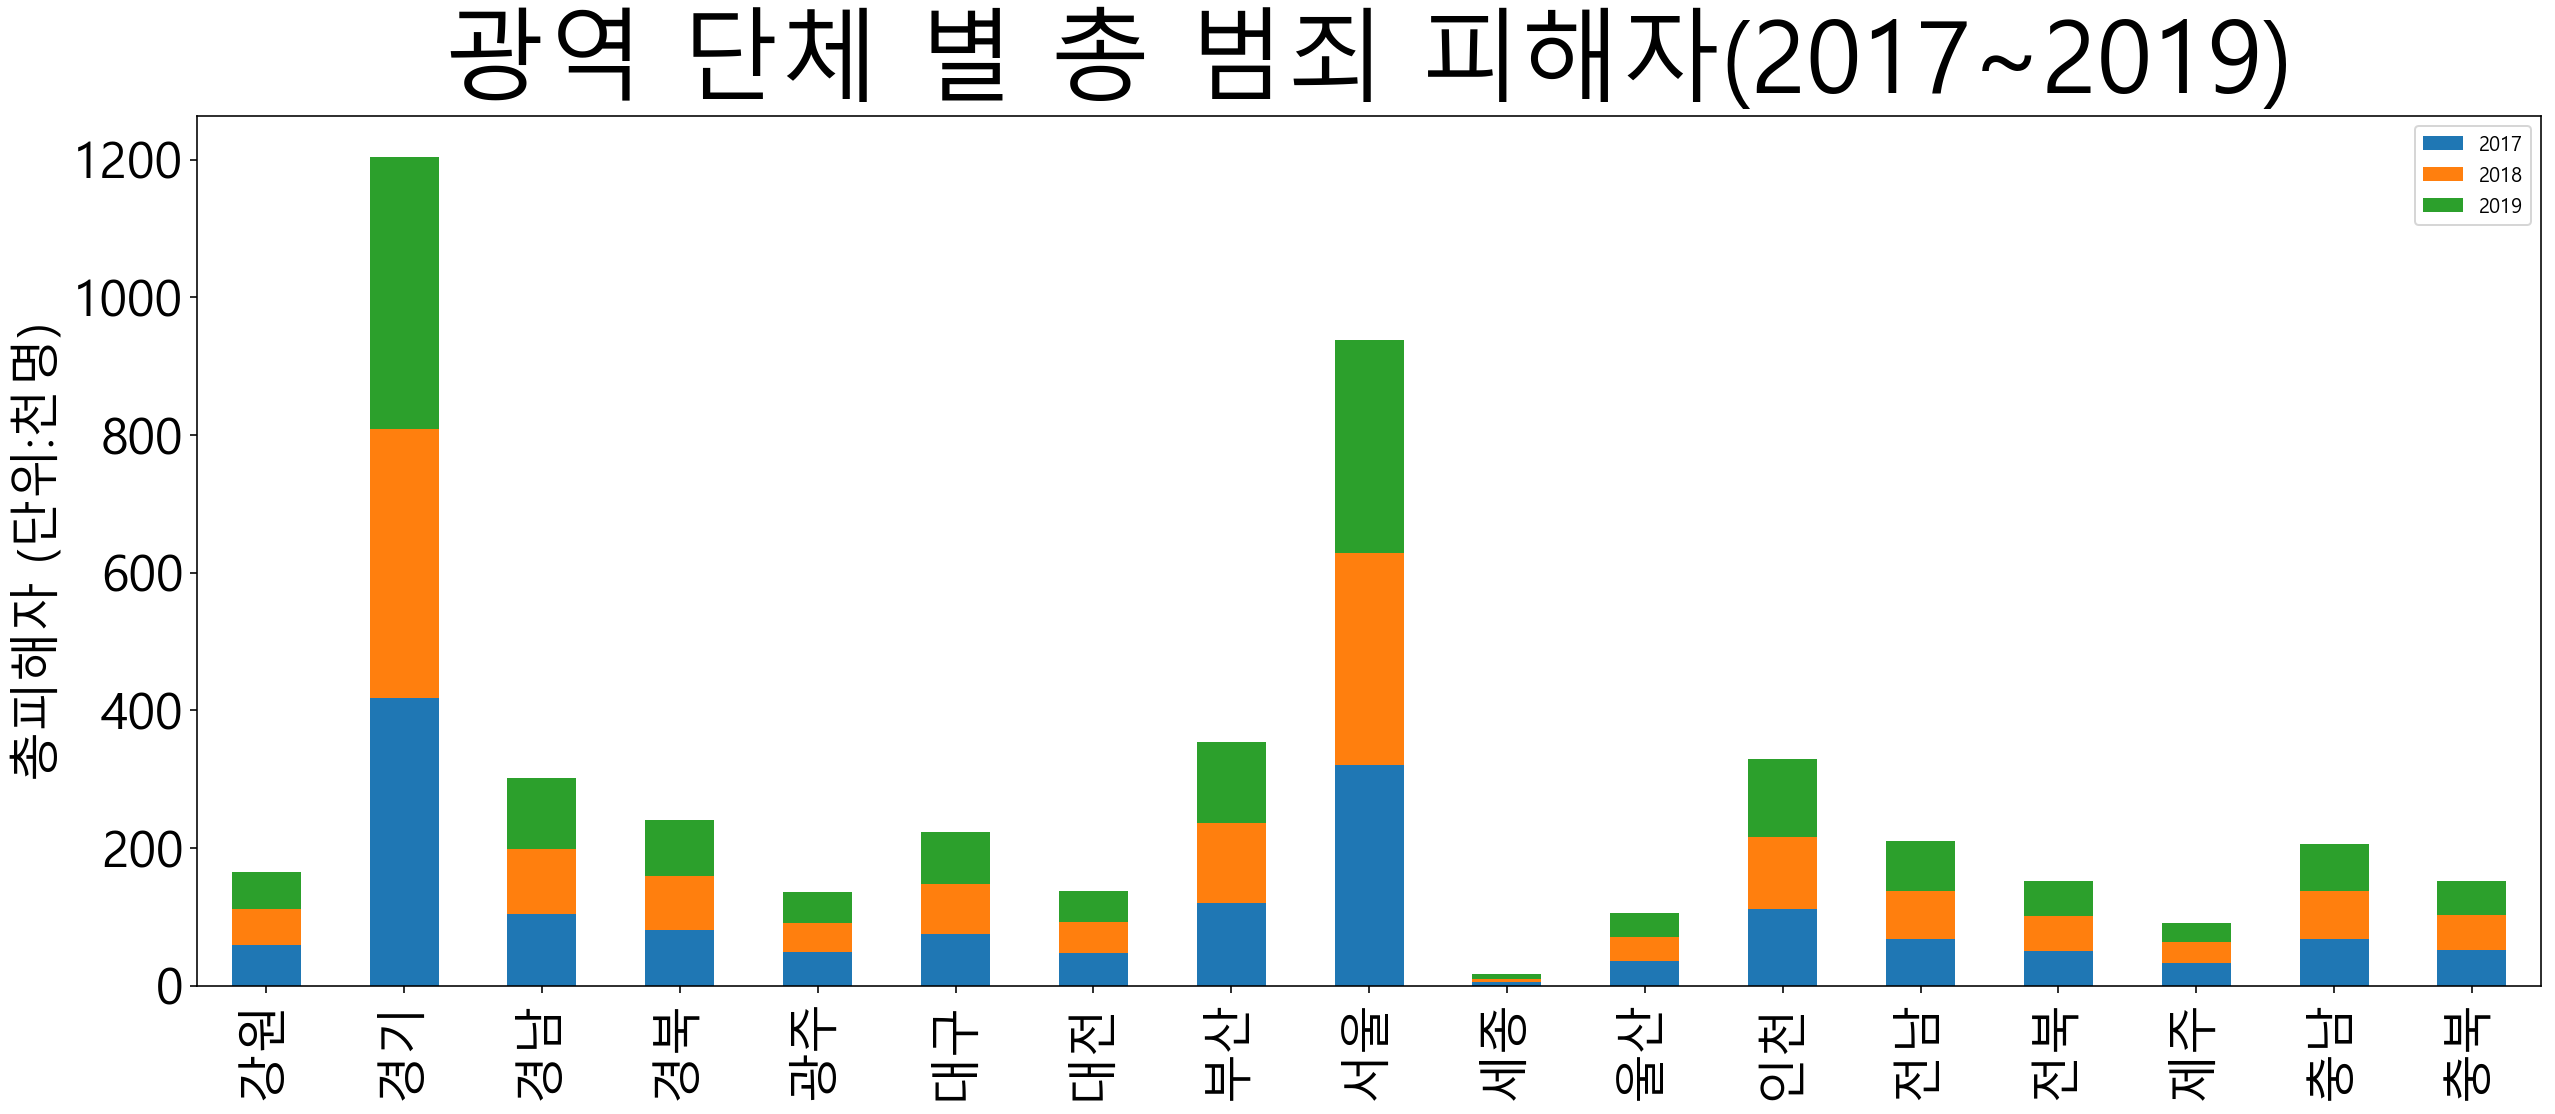

In [27]:
plt.figure(figsize=(21,8))

plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams["figure.figsize"] = (21,8)

b=df_metro2_pivot.plot(kind='bar',stacked=True)
#b=sns.barplot(data=df_metro2, x='광역',y='총피해자',palette='autumn',estimator=np.sum)
plt.title('광역 단체 별 총 범죄 피해자(2017~2019)', fontsize=50)
b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('', fontsize=25)
b.set_ylabel('총피해자 (단위:천명)', fontsize=25)


# 전체 인구 대비 피해자 발생율

## 전체 인구 로드

In [28]:
df4 = pd.read_csv("./../data/지역나이인구.csv", sep=",",encoding='cp949')

## 지역기준 인구/피해자 비율

### 필요한 칼럼만 남김

In [29]:
df_421 = df4[['년도','광역','기초','경찰서','인구수']]

### 지역별 인구수 데이터셋 작업

In [30]:
#성별 데이터 부분합
df_422 = df_421.groupby(['년도','광역','기초','경찰서']).sum().sort_values(by=['년도','광역','기초','경찰서']).reset_index()

### 지역별 피해자수 데이터셋 

In [31]:
df3.head()

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,년도,총피해자
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,1,32,29,28,32,25,경기,의왕시,2017,205
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,2,45,37,37,33,39,경기,의왕시,2017,250
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,3,51,45,44,48,34,경기,의왕시,2017,303
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,4,38,36,46,53,41,경기,의왕시,2017,288
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,5,32,31,34,30,28,경기,의왕시,2017,232


In [32]:
df_4231 = df3[['년도','광역','기초','경찰서','00~06세']]
df_4232 = df3[['년도','광역','기초','경찰서','07~12세']]
df_4233 = df3[['년도','광역','기초','경찰서','13~15세']]
df_4234 = df3[['년도','광역','기초','경찰서','16~20세']]
df_4235 = df3[['년도','광역','기초','경찰서','21~30세']]
df_4236 = df3[['년도','광역','기초','경찰서','31~40세']]
df_4237 = df3[['년도','광역','기초','경찰서','41~50세']]
df_4238 = df3[['년도','광역','기초','경찰서','51~60세']]
df_4239 = df3[['년도','광역','기초','경찰서','61~세']]
df_4230 = df3[['년도','광역','기초','경찰서','나이미상']]



df_4231['연령'] = '00~06세'
df_4232['연령'] = '07~12세'
df_4233['연령'] = '13~15세'
df_4234['연령'] = '16~20세'
df_4235['연령'] = '21~30세'
df_4236['연령'] = '31~40세'
df_4237['연령'] = '41~50세'
df_4238['연령'] = '51~60세'
df_4239['연령'] = '61~세'
df_4230['연령'] = '나이미상'

df_4231.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4232.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4233.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4234.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4235.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4236.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4237.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4238.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4239.columns = ['년도','광역','기초','경찰서','발생건수','연령']
df_4230.columns = ['년도','광역','기초','경찰서','발생건수','연령']


<ipython-input-32-a1db1710d5ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4231['연령'] = '00~06세'
<ipython-input-32-a1db1710d5ac>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4232['연령'] = '07~12세'
<ipython-input-32-a1db1710d5ac>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [33]:
df_423 = pd.concat([df_4231,df_4232,df_4233,df_4234,df_4235,df_4236,df_4237,df_4238,df_4239,df_4230],axis=0)

In [34]:
#df_metro = df3.groupby(['광역']).sum().sort_values(by=['총피해자'],ascending=False)/1000
df_423 = df_423.groupby(['년도','광역','기초','경찰서']).sum().sort_values(by=['년도','광역','기초','경찰서']).reset_index()


### 인구수, 피해자수 로우 데이터 조인

In [35]:
#df_metro2_pivot = df_metro2.pivot(index='광역', columns='작성년', values='총피해자')
df_424 = pd.merge(df_422, df_423)

In [36]:
df_424

,년도,광역,기초,경찰서,인구수,발생건수
0,2017,강원,강릉시,강원강릉경찰서,215914,6864
1,2017,강원,고성군,강원고성경찰서,81060,962
2,2017,강원,동해시,강원동해경찰서,89151,2868
3,2017,강원,삼척시,강원삼척경찰서,67860,2600
4,2017,강원,속초시,강원속초경찰서,78618,4749
...,...,...,...,...,...,...
556,2019,충북,영동군,충북영동경찰서,48004,1002
557,2019,충북,옥천군,충북옥천경찰서,49117,1176
558,2019,충북,음성군,충북음성경찰서,104823,3653
559,2019,충북,증평군,충북괴산경찰서,37493,1924


### 지역기준 인구/피해자 부분합

In [37]:
df_425 = df_424.groupby(['광역'])['광역','발생건수','인구수'].sum().sort_values(by=['광역']).reset_index()

<ipython-input-37-17dffffc8416>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_425 = df_424.groupby(['광역'])['광역','발생건수','인구수'].sum().sort_values(by=['광역']).reset_index()


In [38]:
# 형법 범죄율 정의
df_425['범죄피해율'] = round(df_425['발생건수'] * 100000 / df_425['인구수'],2)

In [39]:
df_425=df_425.sort_values(by=['범죄피해율'],ascending=False)

In [40]:
df_425

,광역,발생건수,인구수,범죄피해율
13,제주,22170,522068,4246.57
11,전남,182667,5262570,3471.06
0,강원,157097,4717008,3330.44
7,부산,201543,6283547,3207.47
15,충북,40621,1269935,3198.67
14,충남,200160,6532491,3064.07
10,인천,114025,3842088,2967.79
8,서울,581803,19798956,2938.55
1,경기,888244,30694142,2893.86
3,경북,184458,6504762,2835.74


### 시각화

Text(0, 0.5, '범죄 피해율 ')

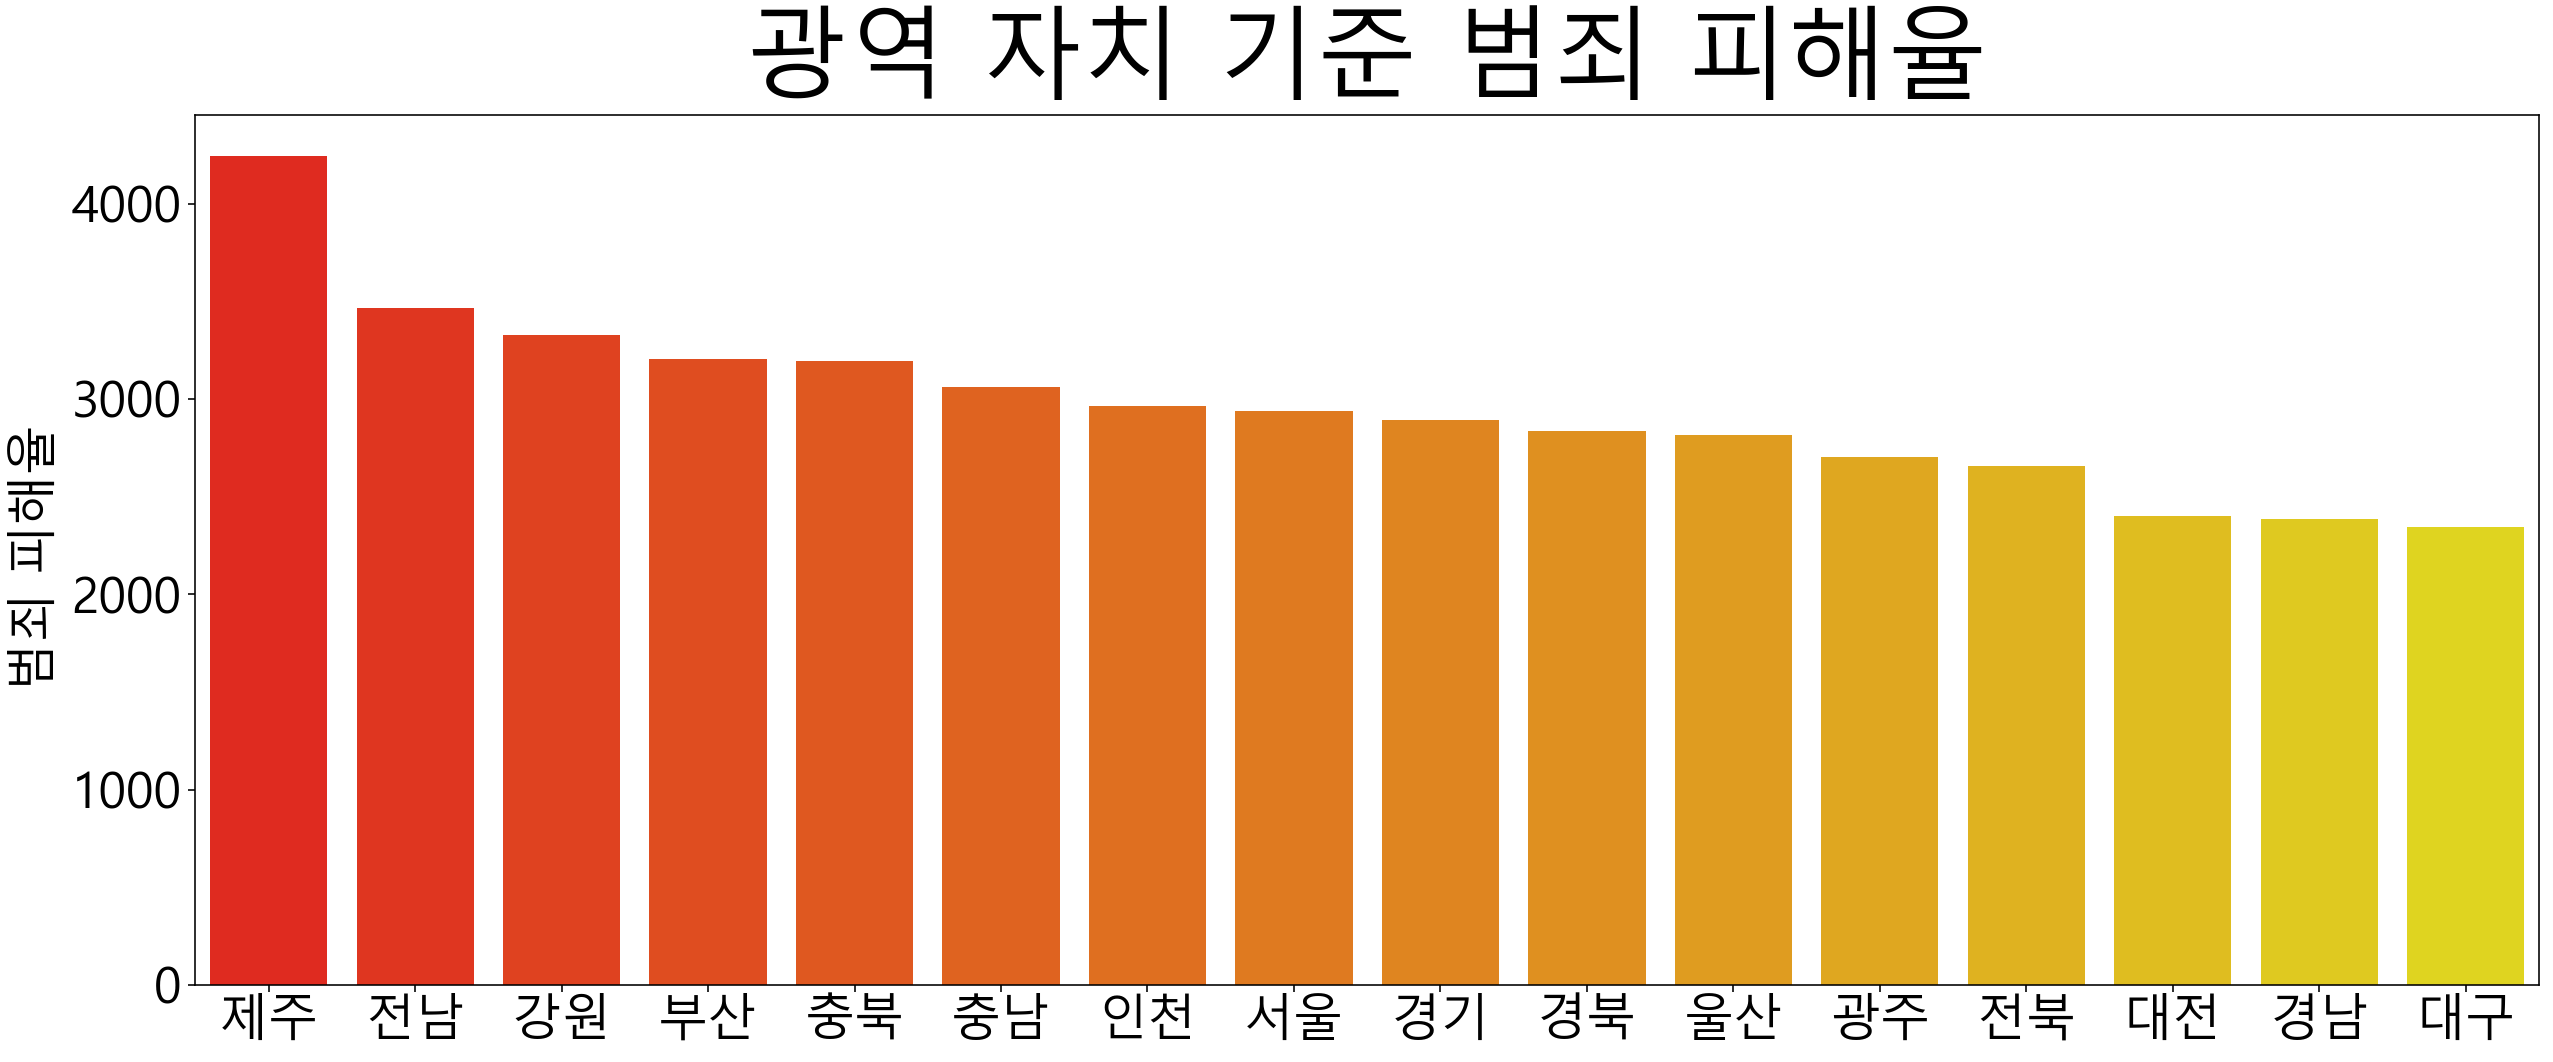

In [41]:
plt.figure(figsize=(21,8))
plt.title('광역 자치 기준 범죄 피해율', fontsize=50)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

b=sns.barplot(data=df_425, x='광역',y='범죄피해율',palette='autumn')

b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('', fontsize=25)
b.set_ylabel('범죄 피해율 ', fontsize=25)


## 광역 자치 범죄 유형별 피해자 비율

### 연령/성별 기준 피해자수 데이터셋

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10169 entries, 0 to 10168
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   발생년월     10169 non-null  int64 
 1   경찰서      10169 non-null  object
 2   피해자(남자)  10169 non-null  int64 
 3   피해자(여자)  10169 non-null  int64 
 4   성별미상     10169 non-null  int64 
 5   00~06세   10169 non-null  int64 
 6   07~12세   10169 non-null  int64 
 7   13~15세   10169 non-null  int64 
 8   16~20세   10169 non-null  int64 
 9   21~30세   10169 non-null  int64 
 10  31~40세   10169 non-null  int64 
 11  41~50세   10169 non-null  int64 
 12  51~60세   10169 non-null  int64 
 13  61~세     10169 non-null  int64 
 14  나이미상     10169 non-null  int64 
 15  강력       10169 non-null  int64 
 16  폭력       10169 non-null  int64 
 17  절도       10169 non-null  int64 
 18  지능       10169 non-null  int64 
 19  기타       10169 non-null  int64 
 20  일        10169 non-null  int64 
 21  월        10169 non-null  int64 
 22

In [43]:
df_4311 = df3[['광역','경찰서','강력']]
df_4312 = df3[['광역','경찰서','폭력']]
df_4313 = df3[['광역','경찰서','절도']]
df_4314 = df3[['광역','경찰서','지능']]
df_4315 = df3[['광역','경찰서','기타']]

df_4311['범죄 유형'] = '강력'
df_4312['범죄 유형'] = '폭력'
df_4313['범죄 유형'] = '절도'
df_4314['범죄 유형'] = '지능'
df_4315['범죄 유형'] = '기타'

df_4311.columns = ['광역','경찰서','피해자(명)','범죄 유형']
df_4312.columns = ['광역','경찰서','피해자(명)','범죄 유형']
df_4313.columns = ['광역','경찰서','피해자(명)','범죄 유형']
df_4314.columns = ['광역','경찰서','피해자(명)','범죄 유형']
df_4315.columns = ['광역','경찰서','피해자(명)','범죄 유형']

<ipython-input-43-fbbf1a49793f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4311['범죄 유형'] = '강력'
<ipython-input-43-fbbf1a49793f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4312['범죄 유형'] = '폭력'
<ipython-input-43-fbbf1a49793f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [44]:
df_431 = pd.concat([df_4311,df_4312,df_4313,df_4314,df_4315],axis=0)

In [45]:
df_431 = pd.concat([df_4311,df_4312,df_4313,df_4314,df_4315],axis=0)
df_431 = df_431.groupby(['광역','경찰서','범죄 유형']).sum().reset_index()
df_431

,광역,경찰서,범죄 유형,피해자(명)
0,강원,강원강릉경찰서,강력,368
1,강원,강원강릉경찰서,기타,8761
2,강원,강원강릉경찰서,절도,2046
3,강원,강원강릉경찰서,지능,3372
4,강원,강원강릉경찰서,폭력,4670
...,...,...,...,...
1400,충북,충북충주경찰서,강력,298
1401,충북,충북충주경찰서,기타,9954
1402,충북,충북충주경찰서,절도,2377
1403,충북,충북충주경찰서,지능,3473


### 범죄 유형 합 계산

In [46]:
df_432 = df_431.groupby(['광역','경찰서']).sum().reset_index()
df_432.columns = ['광역','경찰서','유형합']
df_432

,광역,경찰서,유형합
0,강원,강원강릉경찰서,19217
1,강원,강원고성경찰서,2516
2,강원,강원동해경찰서,7220
3,강원,강원삼척경찰서,6580
4,강원,강원속초경찰서,25636
...,...,...,...
276,충북,충북진천경찰서,7883
277,충북,충북청주상당경찰서,22179
278,충북,충북청주청원경찰서,26040
279,충북,충북청주흥덕경찰서,32905


###  유형 합과 유형 조인

In [47]:
df_433 = pd.merge(df_431, df_432)
df_433['유형%'] = round(df_433['피해자(명)'] * 100 / df_433['유형합'],2)
df_433

,광역,경찰서,범죄 유형,피해자(명),유형합,유형%
0,강원,강원강릉경찰서,강력,368,19217,1.91
1,강원,강원강릉경찰서,기타,8761,19217,45.59
2,강원,강원강릉경찰서,절도,2046,19217,10.65
3,강원,강원강릉경찰서,지능,3372,19217,17.55
4,강원,강원강릉경찰서,폭력,4670,19217,24.30
...,...,...,...,...,...,...
1400,충북,충북충주경찰서,강력,298,18942,1.57
1401,충북,충북충주경찰서,기타,9954,18942,52.55
1402,충북,충북충주경찰서,절도,2377,18942,12.55
1403,충북,충북충주경찰서,지능,3473,18942,18.33


### 시각화

In [48]:
df_434 = df_433[['광역','범죄 유형','유형%']]
df_434

,광역,범죄 유형,유형%
0,강원,강력,1.91
1,강원,기타,45.59
2,강원,절도,10.65
3,강원,지능,17.55
4,강원,폭력,24.30
...,...,...,...
1400,충북,강력,1.57
1401,충북,기타,52.55
1402,충북,절도,12.55
1403,충북,지능,18.33


In [49]:
df_434 = df_434.pivot_table(index='광역', columns=['범죄 유형'], values='유형%')


<Figure size 1080x576 with 0 Axes>

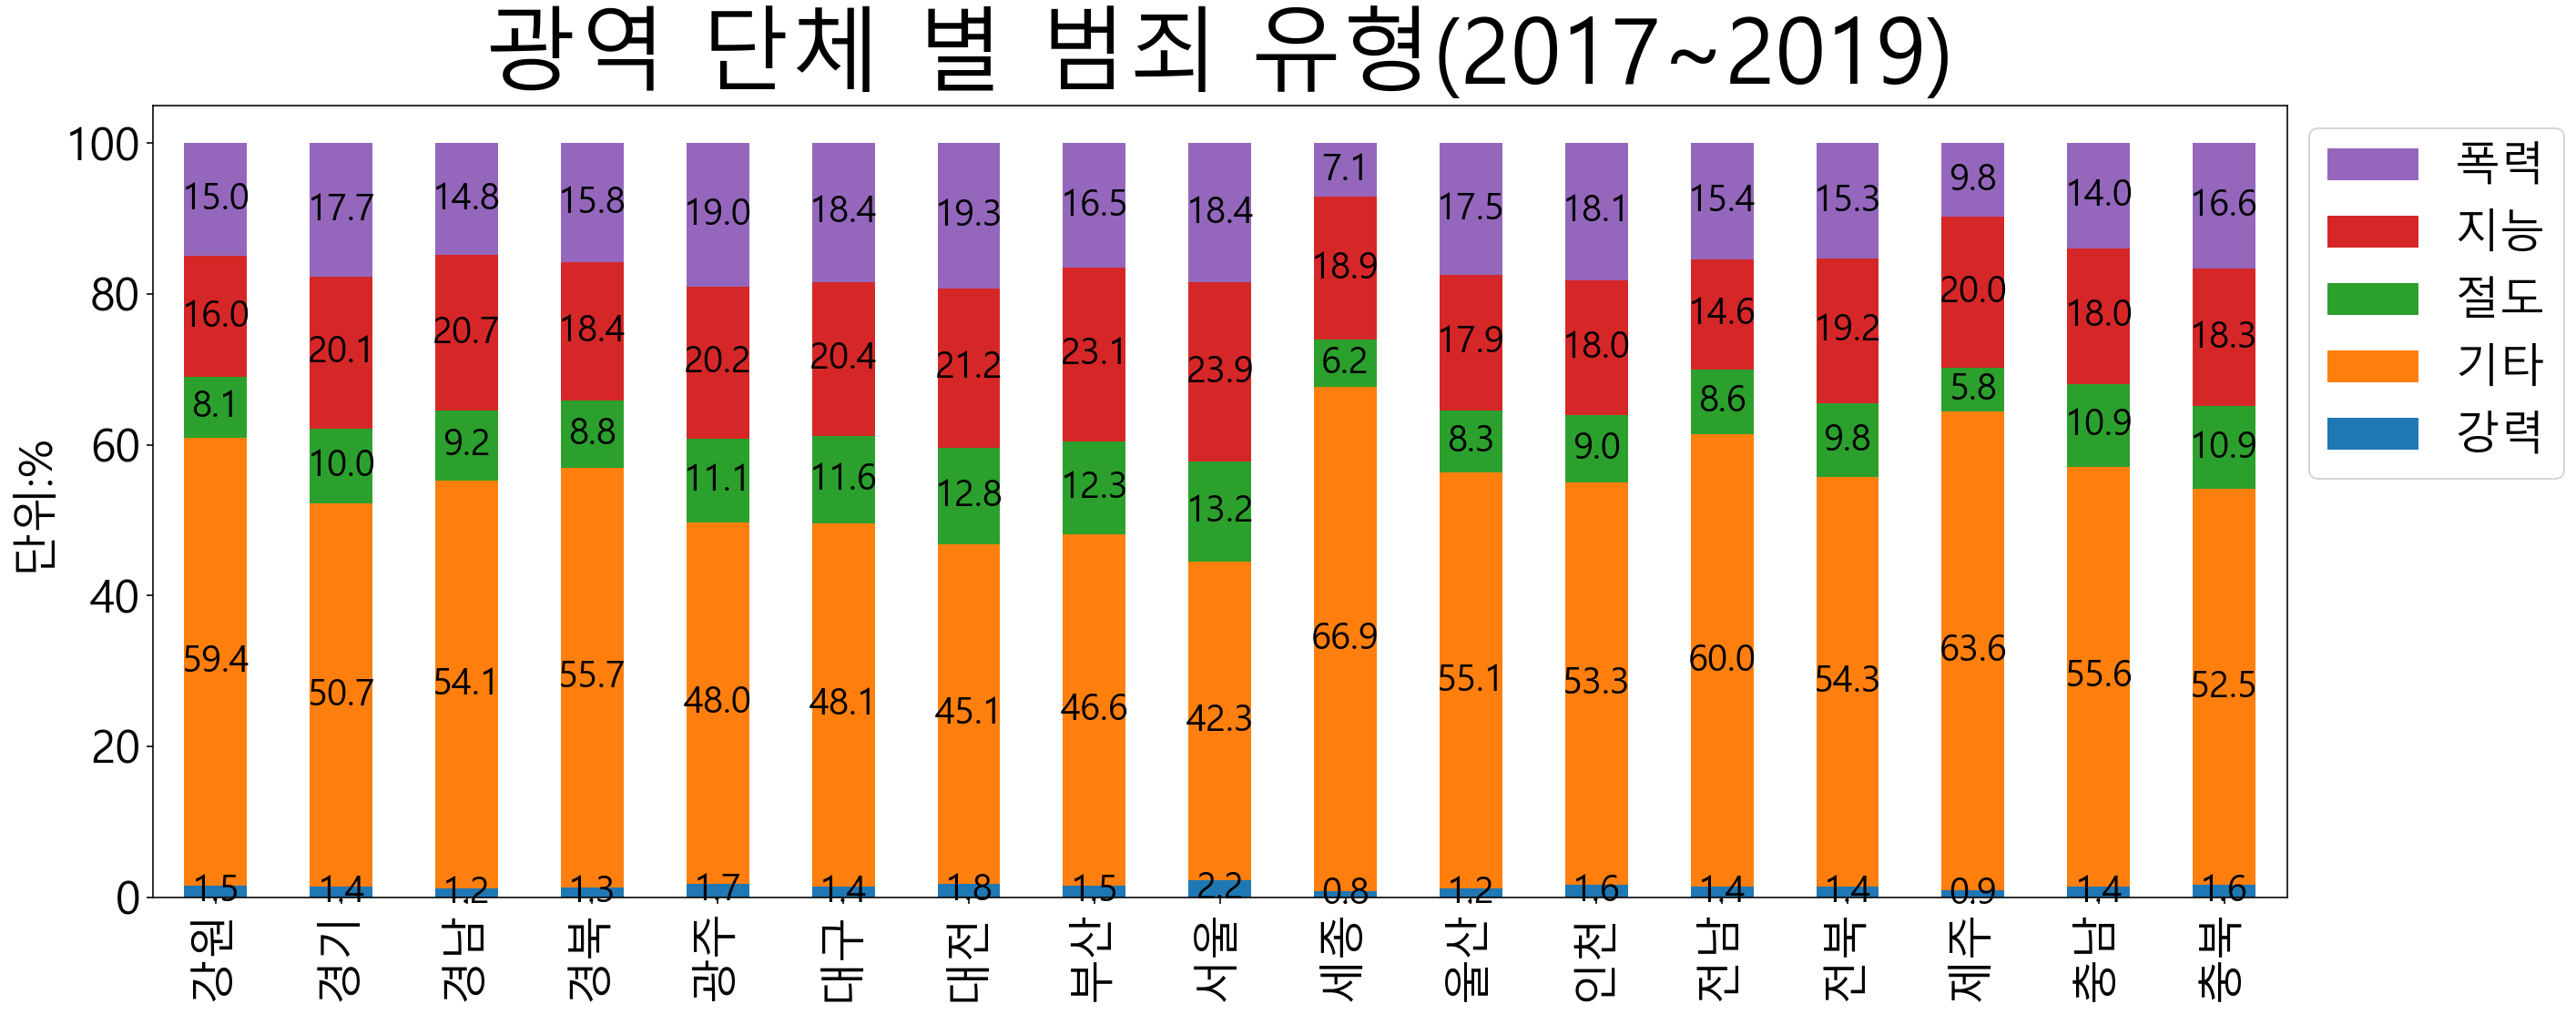

In [50]:
plt.figure(figsize=(15,8))

plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams["figure.figsize"] = (21,8)

b=df_434.plot(kind='bar',stacked=True)
#b=sns.barplot(data=df_metro2, x='광역',y='총피해자',palette='autumn',estimator=np.sum)
plt.title('광역 단체 별 범죄 유형(2017~2019)', fontsize=50)
handles, labels = b.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='upper center', bbox_to_anchor=(1.07, 1), ncol=1,prop={'size': 25})


b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('', fontsize=25)
b.set_ylabel('단위:%', fontsize=25)


for p in b.patches:
    left, bottom, width, height = p.get_bbox().bounds
    b.annotate("%.1f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize=20)
#plt.sca(b)
#plt.box(False)

# 인구 밀도

## 인구 밀도 데이터 로드

In [51]:
df5 = pd.read_csv("./../data/인구밀도3.csv", sep=",",encoding='cp949')
df5 = df5.sort_values(by=['인구밀도 (명/㎢)'],ascending=False)
df5_1 = pd.read_csv("./../data/인구밀도.csv", sep=",",encoding='cp949')

In [52]:
df5_1['기초2'] =df5_1['기초']

## 밀도와 범죄율 상관계수

### 광역 기준 범죄 개수 

In [53]:
df_521 = df3.loc[df3['년도'].isin([2017])]
df_521.head()

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,년도,총피해자
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,1,32,29,28,32,25,경기,의왕시,2017,205
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,2,45,37,37,33,39,경기,의왕시,2017,250
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,3,51,45,44,48,34,경기,의왕시,2017,303
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,4,38,36,46,53,41,경기,의왕시,2017,288
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,5,32,31,34,30,28,경기,의왕시,2017,232


In [54]:
df_521['기초2'] = df_521['기초'].apply(lambda x: str(x)[:str(x).find('시')+1] if str(x).find("시") != -1 else x)

<ipython-input-54-ef137c45fa66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_521['기초2'] = df_521['기초'].apply(lambda x: str(x)[:str(x).find('시')+1] if str(x).find("시") != -1 else x)


In [55]:
df_521.head()

,발생년월,경찰서,피해자(남자),피해자(여자),성별미상,00~06세,07~12세,13~15세,16~20세,21~30세,31~40세,41~50세,51~60세,61~세,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,년도,총피해자,기초2
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,1,32,29,28,32,25,경기,의왕시,2017,205,의왕시
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,2,45,37,37,33,39,경기,의왕시,2017,250,의왕시
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,3,51,45,44,48,34,경기,의왕시,2017,303,의왕시
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,4,38,36,46,53,41,경기,의왕시,2017,288,의왕시
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,5,32,31,34,30,28,경기,의왕시,2017,232,의왕시


In [56]:

df_521 = df_521.groupby(['광역','기초2'])['피해자(남자)','피해자(여자)','성별미상'].sum().reset_index()
df_521['발생건수'] =  df_521['피해자(남자)'] + df_521['피해자(여자)'] + df_521['성별미상']
df_521

<ipython-input-56-20492f4a0df5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_521 = df_521.groupby(['광역','기초2'])['피해자(남자)','피해자(여자)','성별미상'].sum().reset_index()


,광역,기초2,피해자(남자),피해자(여자),성별미상,발생건수
0,강원,강릉시,3238,1962,1664,6864
1,강원,고성군,394,198,370,962
2,강원,동해시,1214,812,842,2868
3,강원,삼척시,1003,680,917,2600
4,강원,속초시,1998,1222,1529,4749
...,...,...,...,...,...,...
203,충북,제천시,1815,1110,1146,4071
204,충북,증평군,841,504,508,1853
205,충북,진천군,1159,582,762,2503
206,충북,청주시,12516,7359,7994,27869


In [57]:
df_521['기초2'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시',
       '포천시', '하남시', '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시',
       '산청군', '양산시', '의령군', '진주시', '창녕군', '창원시', '통영시', '하동군', '함안군',
       '함양군', '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '문경시',
       '봉화군', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군',
       '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구', '남구', '동구',
       '북구', '서구', '달성군', '수성구', '중구', '유성구', '강서구', '금정구', '기장군', '동래구',
       '부산진구', '사상구', '사하구', '영도구', '해운대구', '강동구', '강북구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '성동구',
       '송파구', '양천구', '영등포구', '용산구', '세종시', '울주군', '강화군', '계양구', '남동구',
     

### 밀도와 범죄 원부 조인

In [58]:
df_522 = pd.merge(df_521, df5_1)
df_522['범죄피해율'] = round(df_522['발생건수'] * 100000 / df_522['성별합'],2)
df_522

,광역,기초2,피해자(남자),피해자(여자),성별미상,발생건수,기초,면적 (㎢),성별합,남자,여자,인구밀도 (명/㎢),인구증가율 (%),범죄피해율
0,강원,강릉시,3238,1962,1664,6864,강릉시,1040.21,213952,106286,107666,205.68,0.05,3208.20
1,강원,고성군,394,198,370,962,고성군,664.28,30029,15817,14212,45.21,-0.28,3203.57
2,강원,동해시,1214,812,842,2868,동해시,180.21,92851,47067,45784,515.24,-0.48,3088.82
3,강원,삼척시,1003,680,917,2600,삼척시,1186.95,68514,34638,33876,57.72,-1.56,3794.84
4,강원,속초시,1998,1222,1529,4749,속초시,105.73,82273,40531,41742,778.14,0.59,5772.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,충북,제천시,1815,1110,1146,4071,제천시,883.40,136432,68428,68004,153.26,-0.06,2983.90
201,충북,증평군,841,504,508,1853,증평군,81.80,37783,19446,18337,456.19,1.27,4904.32
202,충북,진천군,1159,582,762,2503,진천군,407.25,73677,38314,35363,192.06,5.33,3397.26
203,충북,청주시,12516,7359,7994,27869,청주시,940.80,835590,419676,415914,890.46,0.05,3335.25


### 시각화

In [59]:
df_523 =  df_522.sort_values(['범죄피해율'],ascending=False)
df_523

,광역,기초2,피해자(남자),피해자(여자),성별미상,발생건수,기초,면적 (㎢),성별합,남자,여자,인구밀도 (명/㎢),인구증가율 (%),범죄피해율
141,인천,옹진군,3405,1618,2900,7923,옹진군,172.88,21573,12225,9348,124.79,1.04,36726.46
154,전남,신안군,4720,2811,2328,9859,신안군,655.92,42070,22301,19769,64.14,-1.36,23434.75
6,강원,양양군,1998,1222,1529,4749,양양군,630.09,27207,13849,13358,43.18,-0.04,17455.07
138,인천,동구,3405,1618,2900,7923,동구,7.19,69487,35057,34430,9664.39,-2.15,11402.13
112,부산,중구,2193,1247,1404,4844,중구,2.83,44218,21662,22556,15624.73,-2.19,10954.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,경북,봉화군,189,138,172,499,봉화군,1201.79,33259,16550,16709,27.67,-0.83,1500.35
80,경북,예천군,322,186,205,713,예천군,661.42,49253,24246,25007,74.47,6.69,1447.63
177,전북,진안군,169,80,130,379,진안군,789.10,26271,13149,13122,33.29,0.77,1442.66
59,경남,창원시,1931,1185,2040,5156,창원시,747.82,1057032,536167,520865,1413.48,-0.65,487.78


Text(0, 0.5, '범죄 피해율 ')

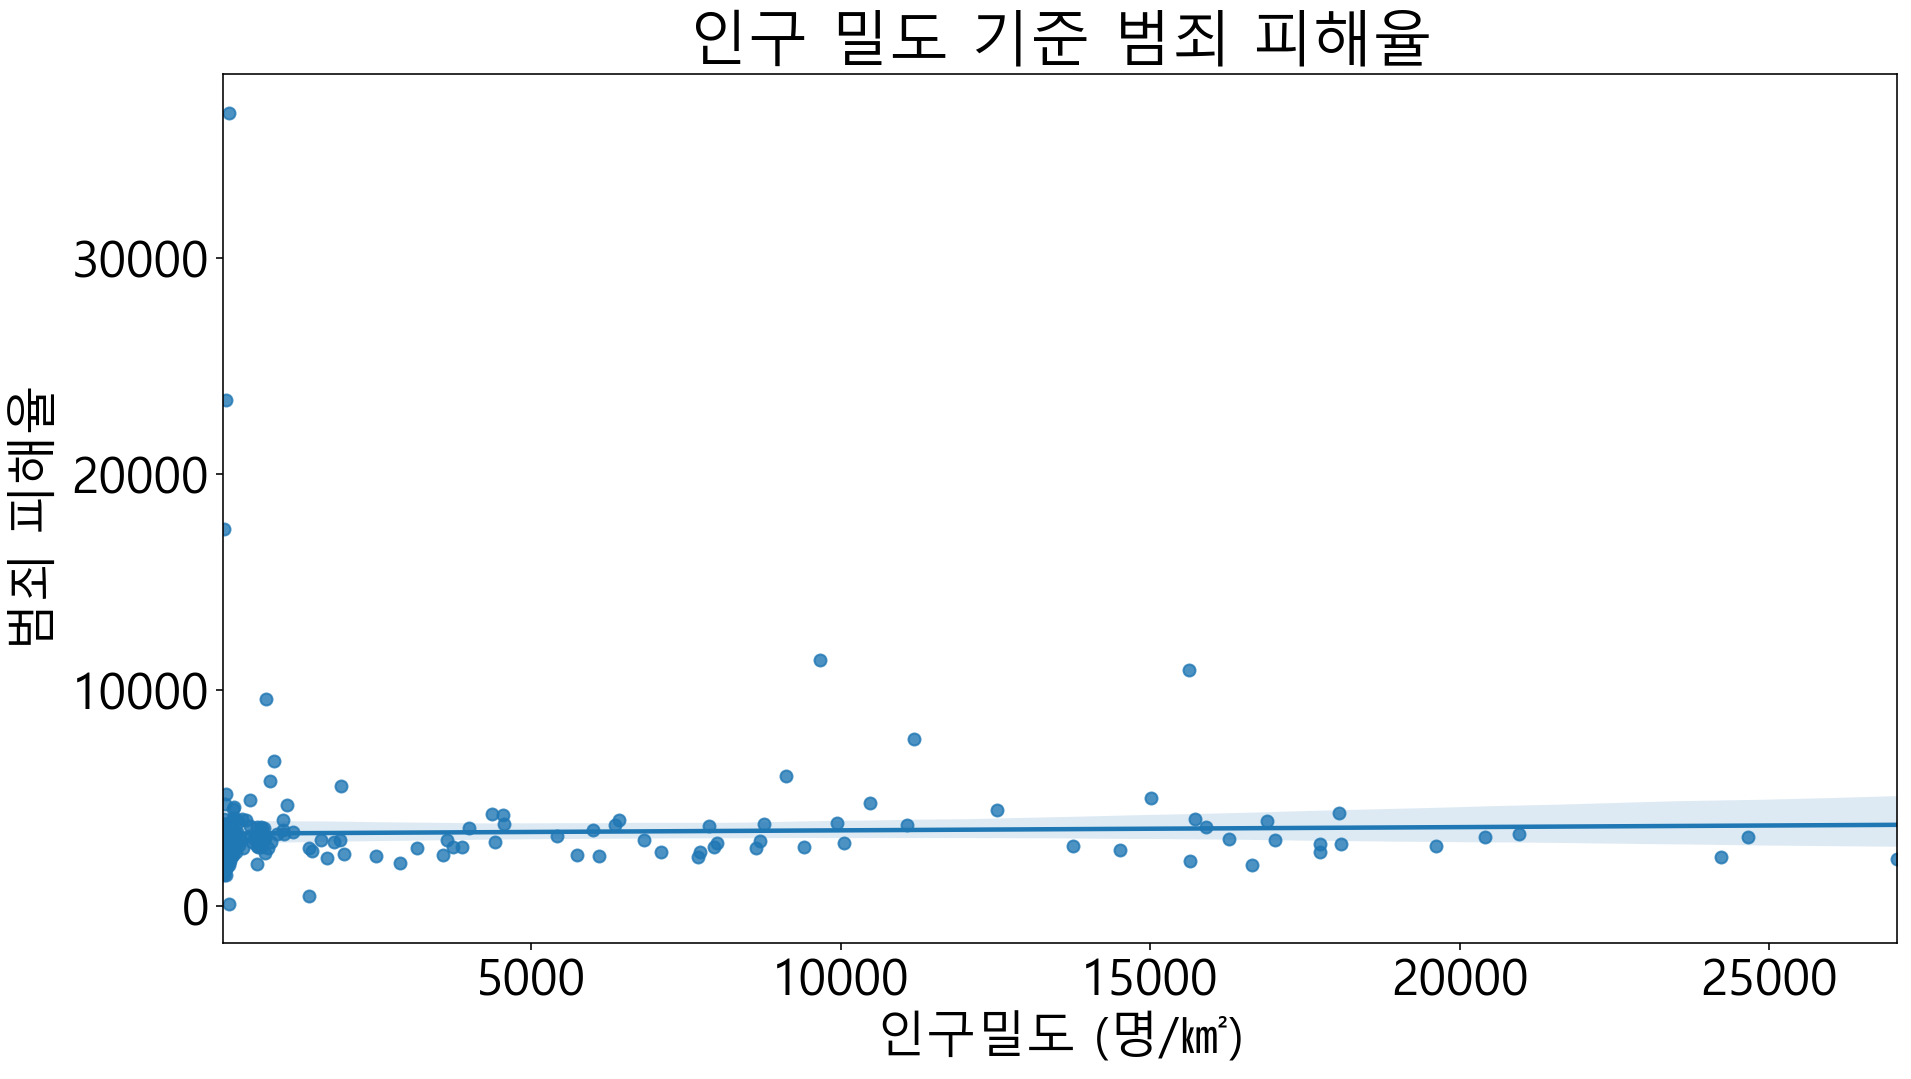

In [60]:
plt.figure(figsize=(15,8))
plt.title('인구 밀도 기준 범죄 피해율', fontsize=30)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

b=sns.regplot(data=df_523, x='인구밀도 (명/㎢)',y='범죄피해율')
type(b)
#b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('인구밀도 (명/㎢)', fontsize=25)
b.set_ylabel('범죄 피해율 ', fontsize=25)


## 인구 밀도 1위와 -1위의 범죄 피해율

### 인구밀도 1위 -1위 데이터 로드

In [61]:
# 인구밀도 1위 서울
# 인구밀도 -1위 강원도
#isin_filter = titanic['sibsp'].isin([3,4,5])

#df_531 = df5.loc[df5['광역'].isin(['서울','강원'])][]
#df_531

## 인구가 비슷한 지역의 인구/피해자

In [62]:
df3.to_csv('g:/sit.csv',encoding='cp949')

## 5.4 인구 밀도가 비슷한 지역의 인구/피해자

## 인구 밀도와 피해자 비율의 상관관계

# 1인 가구